In [1]:
import pandas as pd
df=pd.read_csv("day - day.csv")

In [2]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day.astype(int)
df['month'] = df['dteday'].dt.month.astype(int)
df['year'] = df['dteday'].dt.year.astype(int)

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2,1,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3,1,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4,1,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27,12,2012
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28,12,2012
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29,12,2012
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30,12,2012


In [5]:
cols_drop=['instant','casual','registered','yr','mnth',"atemp","dteday","day","month"]
df=df.drop(columns=cols_drop)

<Axes: >

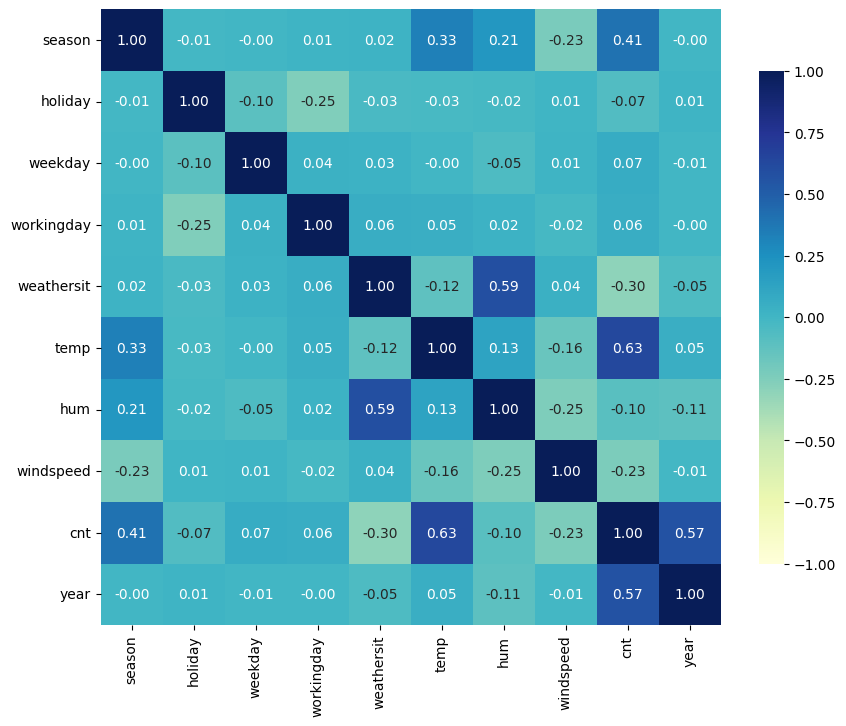

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    vmin=-1, 
    vmax=1,
    cbar_kws={"shrink": 0.8}
)

In [7]:
X=df.drop(columns=["cnt"])
y=df["cnt"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
X

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,year
0,1,0,6,0,2,0.344167,0.805833,0.160446,2011
1,1,0,0,0,2,0.363478,0.696087,0.248539,2011
2,1,0,1,1,1,0.196364,0.437273,0.248309,2011
3,1,0,2,1,1,0.200000,0.590435,0.160296,2011
4,1,0,3,1,1,0.226957,0.436957,0.186900,2011
...,...,...,...,...,...,...,...,...,...
726,1,0,4,1,2,0.254167,0.652917,0.350133,2012
727,1,0,5,1,2,0.253333,0.590000,0.155471,2012
728,1,0,6,0,2,0.253333,0.752917,0.124383,2012
729,1,0,0,0,1,0.255833,0.483333,0.350754,2012


In [10]:
from sklearn.model_selection import train_test_split
# Create Column Transformer with 3 types of transformers

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, [0,2,4]),
        ("StandardScaler", numeric_transformer, [5,6,7])
        
    ],remainder='passthrough'
    
)

In [11]:
X_train=preprocessor.fit_transform(X_train)

In [12]:
X_test=preprocessor.transform(X_test)


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 807.0939
- Mean Absolute Error: 582.0468
- R2 Score: 0.8223
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 810.0190
- Mean Absolute Error: 607.5596
- R2 Score: 0.8364


Lasso
Model performance for Training set
- Root Mean Squared Error: 807.2365
- Mean Absolute Error: 582.5213
- R2 Score: 0.8222
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 811.1231
- Mean Absolute Error: 607.2092
- R2 Score: 0.8359


Ridge
Model performance for Training set
- Root Mean Squared Error: 807.5781
- Mean Absolute Error: 584.0413
- R2 Score: 0.8221
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 812.8393
- Mean Absolute Error: 607.6819
- R2 Score: 0.8352


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 754.5147
- Mean Absolute Error: 590.3647
- R2 Score: 0.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize few parameters for Hyperparameter tuning
rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, 6, 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

gradient_params = {
    "loss": ['squared_error', 'huber', 'absolute_error'],
    "criterion": ['friedman_mse', 'squared_error'],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 8, 15, None, 10]
}

knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11, 15],
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "p": [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Models list for Hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestRegressor(), rf_params),
    ("GradientBoost", GradientBoostingRegressor(), gradient_params),
    ("KNN", KNeighborsRegressor(), knn_params)
]

# Hyperparameter Tuning
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=150,
        cv=5,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

# Display best parameters for each model
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=1000,
        min_samples_split=2,
        max_features=6,
        max_depth=15,
        n_jobs=-1
    ),

    "GradientBoost Regressor": GradientBoostingRegressor(
        n_estimators=500,
        min_samples_split=15,
        max_depth=5,
        loss='absolute_error',
        criterion='friedman_mse'
    ),

    "KNN Regressor": KNeighborsRegressor(
        n_neighbors=5,
        weights='distance',
        algorithm='auto',
        p=1
    )
}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print('=' * 35)
    print()


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 256.9212
- Mean Absolute Error: 187.7397
- R2 Score: 0.9820
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 689.9768
- Mean Absolute Error: 480.8544
- R2 Score: 0.8813

GradientBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 357.9805
- Mean Absolute Error: 184.1012
- R2 Score: 0.9650
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 664.4430
- Mean Absolute Error: 467.8846
- R2 Score: 0.8899

KNN Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 906.3768
- Mean Absolute Error: 668.1419
- R2 Score: 0.7951

